In [1]:
MODEL_NAME = 'ResNet'

In [2]:
import numpy as np
import csv
# from tqdm.notebook import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

from model import Network, SimpleNET, ResNet

if MODEL_NAME == 'ResNet':
    from config.ResNet_config import *
else:
    from config.baseline_config import *
    
from augmentation import transforms_0, transforms_2
from train import train

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
trainset = datasets.ImageFolder('/dtu/datasets1/02514/hotdog_nothotdog/train', transform=transforms_2)
train_loader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=16)

testset = datasets.ImageFolder('/dtu/datasets1/02514/hotdog_nothotdog/test', transform=transforms_2)
test_loader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=16)

In [4]:
if MODEL_NAME == 'ResNet':
    model = eval(MODEL_NAME)(n_features=CONV_SIZE, num_res_blocks=NUM_BLOCKS)
else:
    model = eval(MODEL_NAME)()
    
model.to(device)
loss = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE) # , weight_decay=WEIGHT_DECAY)
lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=DECAY_RATE)

In [5]:
out_dict_adam = train(model, train_loader, test_loader, loss, optimizer, NUM_EPOCHS)

  0%|          | 0/20 [00:00<?, ?epoch/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.709	 test: 0.699	 Accuracy train: 49.3%	 test: 51.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.708	 test: 0.699	 Accuracy train: 50.3%	 test: 51.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.705	 test: 0.781	 Accuracy train: 50.6%	 test: 48.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.697	 test: 0.699	 Accuracy train: 52.8%	 test: 48.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.702	 test: 0.694	 Accuracy train: 52.3%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.703	 test: 0.694	 Accuracy train: 50.6%	 test: 48.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.684	 test: 0.704	 Accuracy train: 55.8%	 test: 49.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.644	 test: 0.638	 Accuracy train: 64.2%	 test: 64.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.629	 test: 0.896	 Accuracy train: 65.5%	 test: 66.3%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.619	 test: 0.643	 Accuracy train: 67.4%	 test: 63.2%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.636	 test: 0.685	 Accuracy train: 65.6%	 test: 62.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.612	 test: 0.686	 Accuracy train: 67.7%	 test: 64.7%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.605	 test: 0.610	 Accuracy train: 68.8%	 test: 66.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.607	 test: 0.626	 Accuracy train: 68.1%	 test: 63.3%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.597	 test: 0.678	 Accuracy train: 68.9%	 test: 63.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.592	 test: 0.638	 Accuracy train: 69.5%	 test: 64.2%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.587	 test: 0.627	 Accuracy train: 70.1%	 test: 66.6%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.596	 test: 0.627	 Accuracy train: 70.3%	 test: 63.5%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.584	 test: 0.598	 Accuracy train: 70.2%	 test: 67.2%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.585	 test: 0.641	 Accuracy train: 70.2%	 test: 64.1%


In [6]:
# saving results
optim = 'Adam'
d = out_dict_adam
if MODEL_NAME == 'ResNet':
    filename = f'results/{MODEL_NAME}/{CONV_SIZE}_kernel_{NUM_BLOCKS}_blocks_{NUM_EPOCHS}_epochs_{LEARNING_RATE:.0e}_lr_{optim}_optim.csv'
else:
    filename = f'results/{MODEL_NAME}/{NUM_EPOCHS}_epochs_{LEARNING_RATE:.0e}_lr_{optim}_optim.csv'
with open(filename, 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(d.keys())
    writer.writerows(zip(*d.values()))

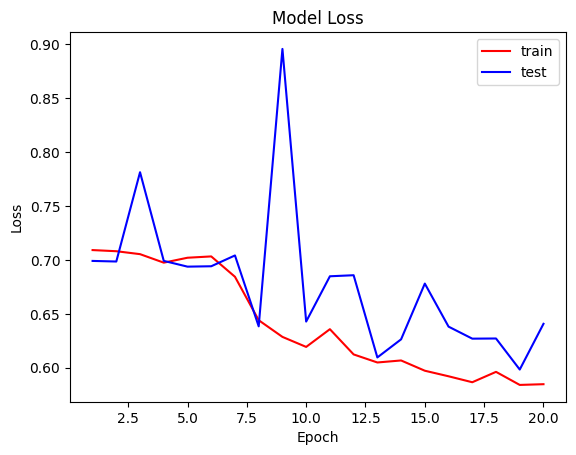

<Figure size 640x480 with 0 Axes>

In [7]:
plt.plot([e for e in range(1, NUM_EPOCHS+1)], out_dict_adam['train_loss'], c='r', label='train')
plt.plot([e for e in range(1, NUM_EPOCHS+1)], out_dict_adam['test_loss'], c='b', label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Model Loss")
plt.legend()
plt.show()
plt.savefig("finalmodel_loss3")

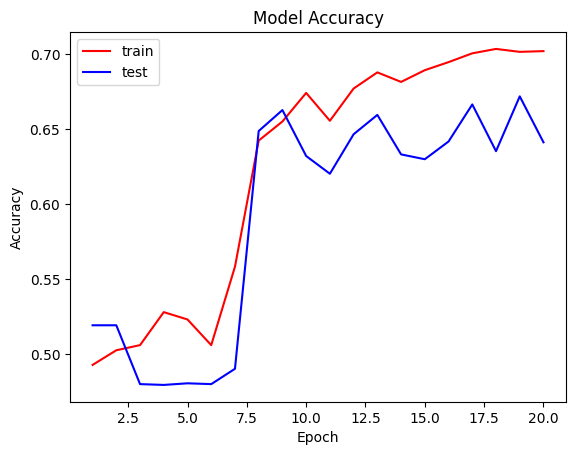

<Figure size 640x480 with 0 Axes>

In [8]:
plt.plot([e for e in range(1, NUM_EPOCHS+1)], out_dict_adam['train_acc'], c='r', label='train')
plt.plot([e for e in range(1, NUM_EPOCHS+1)], out_dict_adam['test_acc'], c='b', label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Model Accuracy")
plt.legend()
plt.show()
plt.savefig("finalmodel_acc3")